In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
import gsw
import scipy.stats as ss

In [2]:
infile = "../Data/SPIROPA_mean_nfr_with_hydrograph.csv"
df = pd.read_csv(infile)
df = df[(df.cruise == 'TGT') & (df.lon_degW > 70.7)& (df.lon_degW < 70.88)] # section only

(70.0, 72.0)

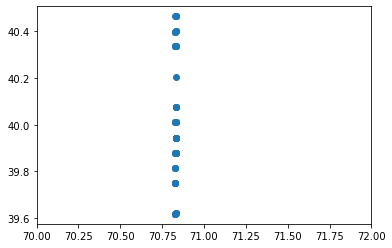

In [3]:
plt.scatter(df.lon_degW,df.lat_degN)

sub = df[(df.cast >= 32) & (df.cast <=39)]
plt.scatter(sub.lon_degW,sub.lat_degN)

plt.xlim(70,72)

In [4]:
infile = "../Data/tn_cast_locations.txt"
loc = pd.read_csv(infile, sep = '\t')

In [5]:
infile = "../Data/tn_ctd.csv"
ctd = pd.read_csv(infile)

In [6]:
lat = []
lon = []
day = []
for i in ctd.cast:
    sub = loc[loc.cast ==i]
    lati = sub.lat.item()
    loni = sub.lon.item()
    dayi = sub.day.item()
    lat.append(lati)
    lon.append(loni)
    day.append(dayi)
ctd['lat'] = lat
ctd['lon'] = lon
ctd['day'] = day
ctd.to_csv('../Data/ctd_tn_withlocation.csv')

In [7]:
ctd = ctd[(ctd.lon > 70.7)& (ctd.lon < 70.9)]

In [8]:
infile = "../Data/bathy_fromWZpaper.csv"
bathy = pd.read_csv(infile)

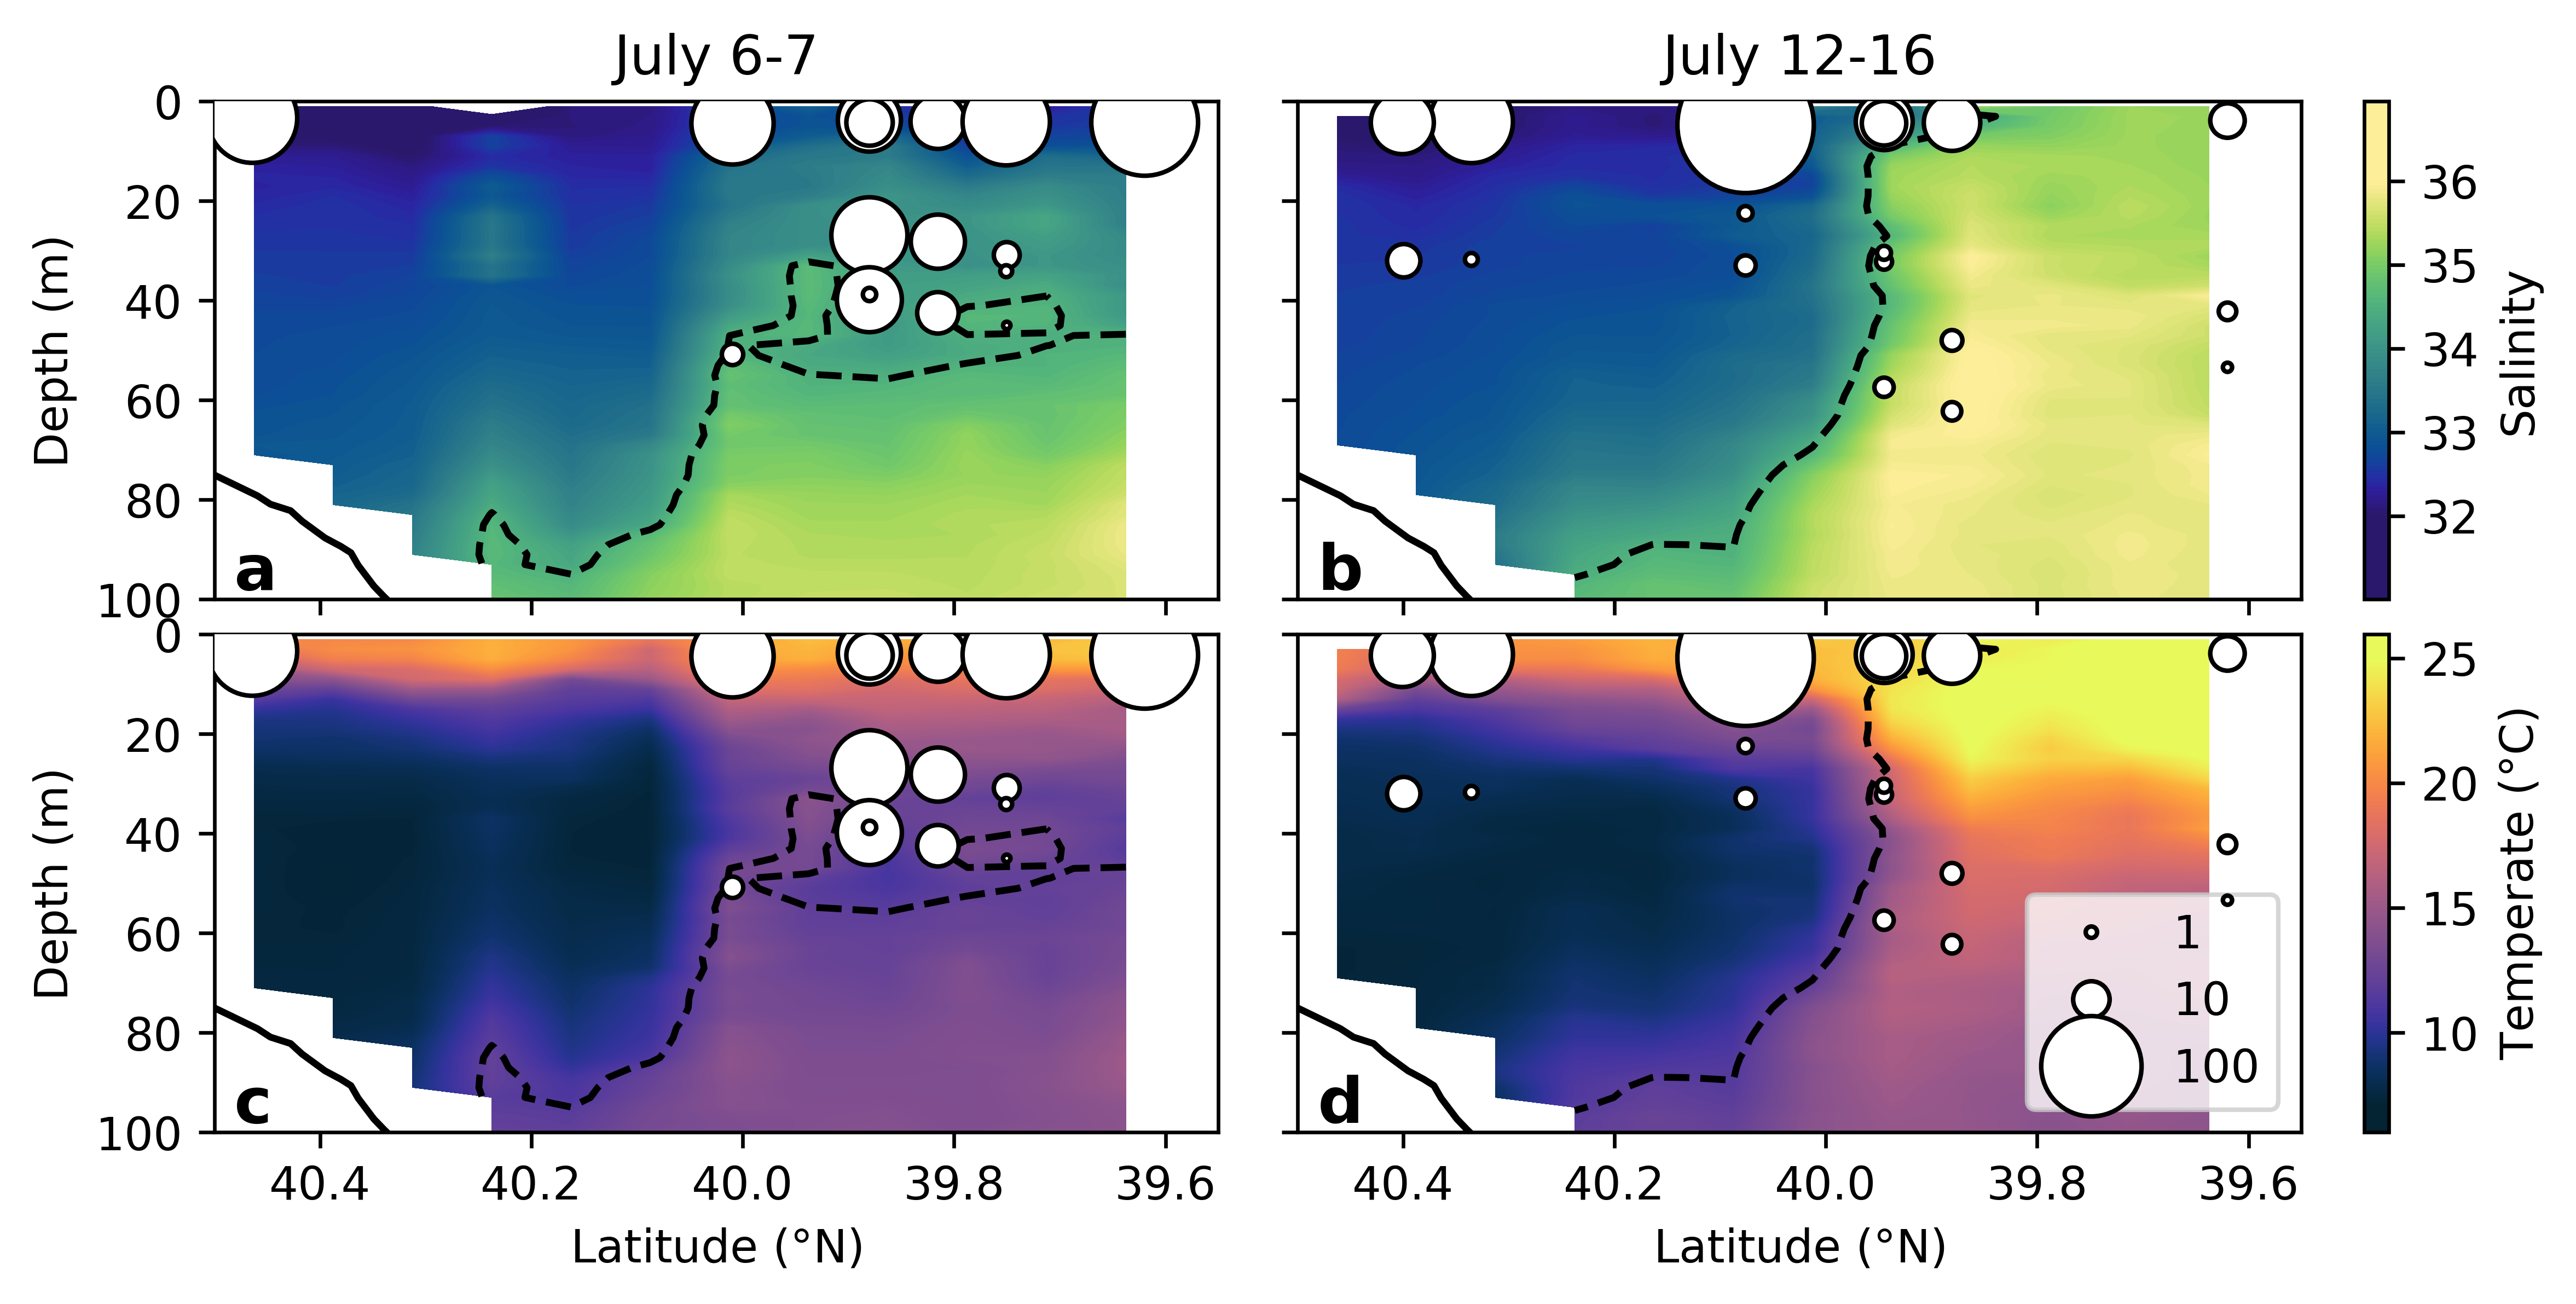

In [9]:
fig, ([ax,ax1],[ax2,ax3]) = plt.subplots(2,2, dpi = 600, figsize = (8,4), sharey = True, sharex = True, gridspec_kw={'width_ratios': [1.6,2]})

#### FIRST SET ######
# distinguish cast
low_cast = 1
high_cast = 31 #july 6-7
sctd = ctd[(ctd.cast >= low_cast) & (ctd.cast <= high_cast)]

# make a grid
x = np.arange(39, 41, .075)
y = np.arange(0, 200, 2)
xx, yy = np.meshgrid(x, y)

#### FIRST AX (AX) #####
# bin the data into the grid
binned = ss.binned_statistic_2d(sctd.lat, sctd.depth, sctd.sal1, statistic='mean', bins=[x, y])

# to do a contour plot, you need to reference the center of the bins, not the edges
# get the bin centers
xc = (x[:-1] + x[1:]) / 2
yc = (y[:-1] + y[1:]) / 2

# plot the data
vmin = 32
vmax = 36
levels = np.arange(vmin-1,vmax+1, 0.05)
palette = 'cmo.haline'

m = ax.contourf(xc, yc, binned.statistic.T, levels = levels, vmin = vmin, vmax = vmax, cmap = palette)

# cb = plt.colorbar(m, ticks = np.arange(vmin,vmax+2,1), ax = ax1)
# cb.set_label('Salinity')

ax.contour(xc, yc, binned.statistic.T, levels = [34.5], zorder = 2, colors = 'black', linestyles = '--')
ax2.contour(xc, yc, binned.statistic.T, levels = [34.5], zorder = 2, colors = 'black', linestyles = '--')

# plot NFR
stream = df[(df.cast >= low_cast) & (df.cast <= high_cast)]
ax.scatter(stream.lat_degN,stream.truedepth_m + 2, s = 5*stream.nfr_toplot, zorder = 10, color = 'w', edgecolors = 'k')

# plot bathymetry
ax.plot(bathy.lat,bathy.depth, 'k')

####  SECOND AX (AX2) #####
# bin the data into the grid
binned = ss.binned_statistic_2d(sctd.lat, sctd.depth, sctd.temp_C1, statistic='mean', bins=[x, y])

# to do a contour plot, you need to reference the center of the bins, not the edges
# get the bin centers
xc = (x[:-1] + x[1:]) / 2
yc = (y[:-1] + y[1:]) / 2

# plot the data
vmin = 7
vmax = 25
levels = np.arange(vmin-1,vmax+1, 0.05)
palette = 'cmo.thermal'

m = ax2.contourf(xc, yc, binned.statistic.T, levels = levels, vmin = vmin, vmax = vmax, cmap = palette)

# cb = plt.colorbar(m, ticks = np.arange(vmin,vmax+2,1), ax = ax3)
# cb.set_label('Salinity')

# plot NFR
stream = df[(df.cast >= low_cast) & (df.cast <= high_cast)]
ax2.scatter(stream.lat_degN,stream.truedepth_m + 2, s = 5*stream.nfr_toplot, zorder = 10, color = 'w', edgecolors = 'k')

# plot bathymetry
ax2.plot(bathy.lat,bathy.depth, 'k')


########################################

#### SECOND SET ######
# distinguish cast
low_cast = 68
high_cast = 111 #july 12-16
sctd = ctd[(ctd.cast >= low_cast) & (ctd.cast <= high_cast)]

# make a grid
x = np.arange(39, 41, .075)
y = np.arange(0, 200, 2)
xx, yy = np.meshgrid(x, y)

#### FIRST AX (AX) #####
# bin the data into the grid
binned = ss.binned_statistic_2d(sctd.lat, sctd.depth, sctd.sal1, statistic='mean', bins=[x, y])

# to do a contour plot, you need to reference the center of the bins, not the edges
# get the bin centers
xc = (x[:-1] + x[1:]) / 2
yc = (y[:-1] + y[1:]) / 2

# plot the data
vmin = 32
vmax = 36
levels = np.arange(vmin-1,vmax+1, 0.05)
palette = 'cmo.haline'

m = ax1.contourf(xc, yc, binned.statistic.T, levels = levels, vmin = vmin, vmax = vmax, cmap = palette)

cb = plt.colorbar(m, ticks = np.arange(vmin,vmax+2,1), ax = ax1)
cb.set_label('Salinity')

ax1.contour(xc, yc, binned.statistic.T, levels = [34.5], zorder = 2, colors = 'black', linestyles = '--')
ax3.contour(xc, yc, binned.statistic.T, levels = [34.5], zorder = 2, colors = 'black', linestyles = '--')

# plot NFR
stream = df[(df.cast >= low_cast) & (df.cast <= high_cast)]
ax1.scatter(stream.lat_degN,stream.truedepth_m + 2, s = 5*stream.nfr_toplot, zorder = 10, color = 'w', edgecolors = 'k')

# plot bathymetry
ax1.plot(bathy.lat,bathy.depth, 'k')

####  SECOND AX (AX2) #####
# bin the data into the grid
binned = ss.binned_statistic_2d(sctd.lat, sctd.depth, sctd.temp_C1, statistic='mean', bins=[x, y])

# to do a contour plot, you need to reference the center of the bins, not the edges
# get the bin centers
xc = (x[:-1] + x[1:]) / 2
yc = (y[:-1] + y[1:]) / 2

# plot the data
vmin = 7
vmax = 25
levels = np.arange(vmin-1,vmax+1, 0.05)
palette = 'cmo.thermal'

m = ax3.contourf(xc, yc, binned.statistic.T, levels = levels, vmin = vmin, vmax = vmax, cmap = palette)

cb = plt.colorbar(m, ticks = np.arange(vmin-2,vmax+2,5), ax = ax3)
cb.set_label('Temperate ($\degree$C)')

# plot NFR
stream = df[(df.cast >= low_cast) & (df.cast <= high_cast)]
ax3.scatter(stream.lat_degN,stream.truedepth_m + 2, s = 5*stream.nfr_toplot, zorder = 10, color = 'w', edgecolors = 'k')

# plot bathymetry
ax3.plot(bathy.lat,bathy.depth, 'k')


######################################## PLOT SET UP
ax.set_xlim(39.55, 40.5)
ax.set_ylim(0, 100)
#plt.clim(32,36.01, ax = ax)

ax.invert_yaxis()
ax.invert_xaxis()

ax2.set_xlabel('Latitude ($\degree$N)')
ax3.set_xlabel('Latitude ($\degree$N)')

ax.set_ylabel('Depth (m)')
ax2.set_ylabel('Depth (m)')

ax.set_title('July 6-7')
ax1.set_title('July 12-16')

import string
for n, axis in enumerate([ax, ax1,ax2,ax3]):
    axis.text(0.02, 0.02, string.ascii_lowercase[n], transform=axis.transAxes, 
            size=14, weight='bold', zorder = 100, color = 'k')

plt.subplots_adjust(wspace = 0.07, hspace = 0.07)

### legend
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='None', label='1',
                          markerfacecolor='w', markeredgecolor = 'k', markersize=2.5),
                   Line2D([0], [0], marker='o', color='None', label='10',
                          markerfacecolor='w', markeredgecolor = 'k', markersize=8),
                   Line2D([0], [0], marker='o', color='None', label='100',
                          markerfacecolor='w', markeredgecolor = 'k', markersize=22)]

ax3.legend(handles=legend_elements, loc='lower right')

plt.gcf().subplots_adjust(left = 0.09, right = 0.98, bottom = 0.14, top = 0.925)

plt.savefig('../Figures/Fig2_streamer_sections.png')

## OLD 

In [185]:
def make_sal_section(): # needs "low_cast" and "high_cast" defined
    # distinguish cast
    sctd = ctd[(ctd.cast >= low_cast) & (ctd.cast <= high_cast)]
    
    # make a grid
    x = np.arange(39, 41, .075)
    y = np.arange(0, 200, 2)
    xx, yy = np.meshgrid(x, y)
    
    # bin the data into the grid
    binned = ss.binned_statistic_2d(sctd.lat, sctd.depth, sctd.sal1, statistic='mean', bins=[x, y])
    
    # to do a contour plot, you need to reference the center of the bins, not the edges
    # get the bin centers
    xc = (x[:-1] + x[1:]) / 2
    yc = (y[:-1] + y[1:]) / 2

    fig, ax = plt.subplots(1,1, dpi = 600, figsize = (6.5,3))

    vmin = 32
    vmax = 36
    levels = np.arange(vmin-1,vmax+1, 0.05)
    palette = 'cmo.thermal'
    m = plt.contourf(xc, yc, binned.statistic.T, levels = levels, vmin = vmin, vmax = vmax, cmap = palette)

    cb = plt.colorbar(m, ticks = np.arange(vmin,vmax+2,1))

    cb.set_label('Salinity')

    plt.contour(xc, yc, binned.statistic.T, levels = [34.5], zorder = 2, colors = 'black', linestyles = '--')

    plt.xlim(39.55, 40.5)
 #   plt.xlim(39,41)
    plt.ylim(2, 100)
    plt.clim(32,36.01)
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()

    plt.xlabel('Latitude ($\degree$N)')
    plt.ylabel('Depth (m)')
    
    # plot NFR
    stream = df[(df.cast >= low_cast) & (df.cast <= high_cast)]
    ax.scatter(stream.lat_degN,stream.truedepth_m + 10, s = 10*stream.nfr_toplot, zorder = 10, color = 'w', edgecolors = 'k')

    ax.plot(bathy.lat,bathy.depth, 'k')

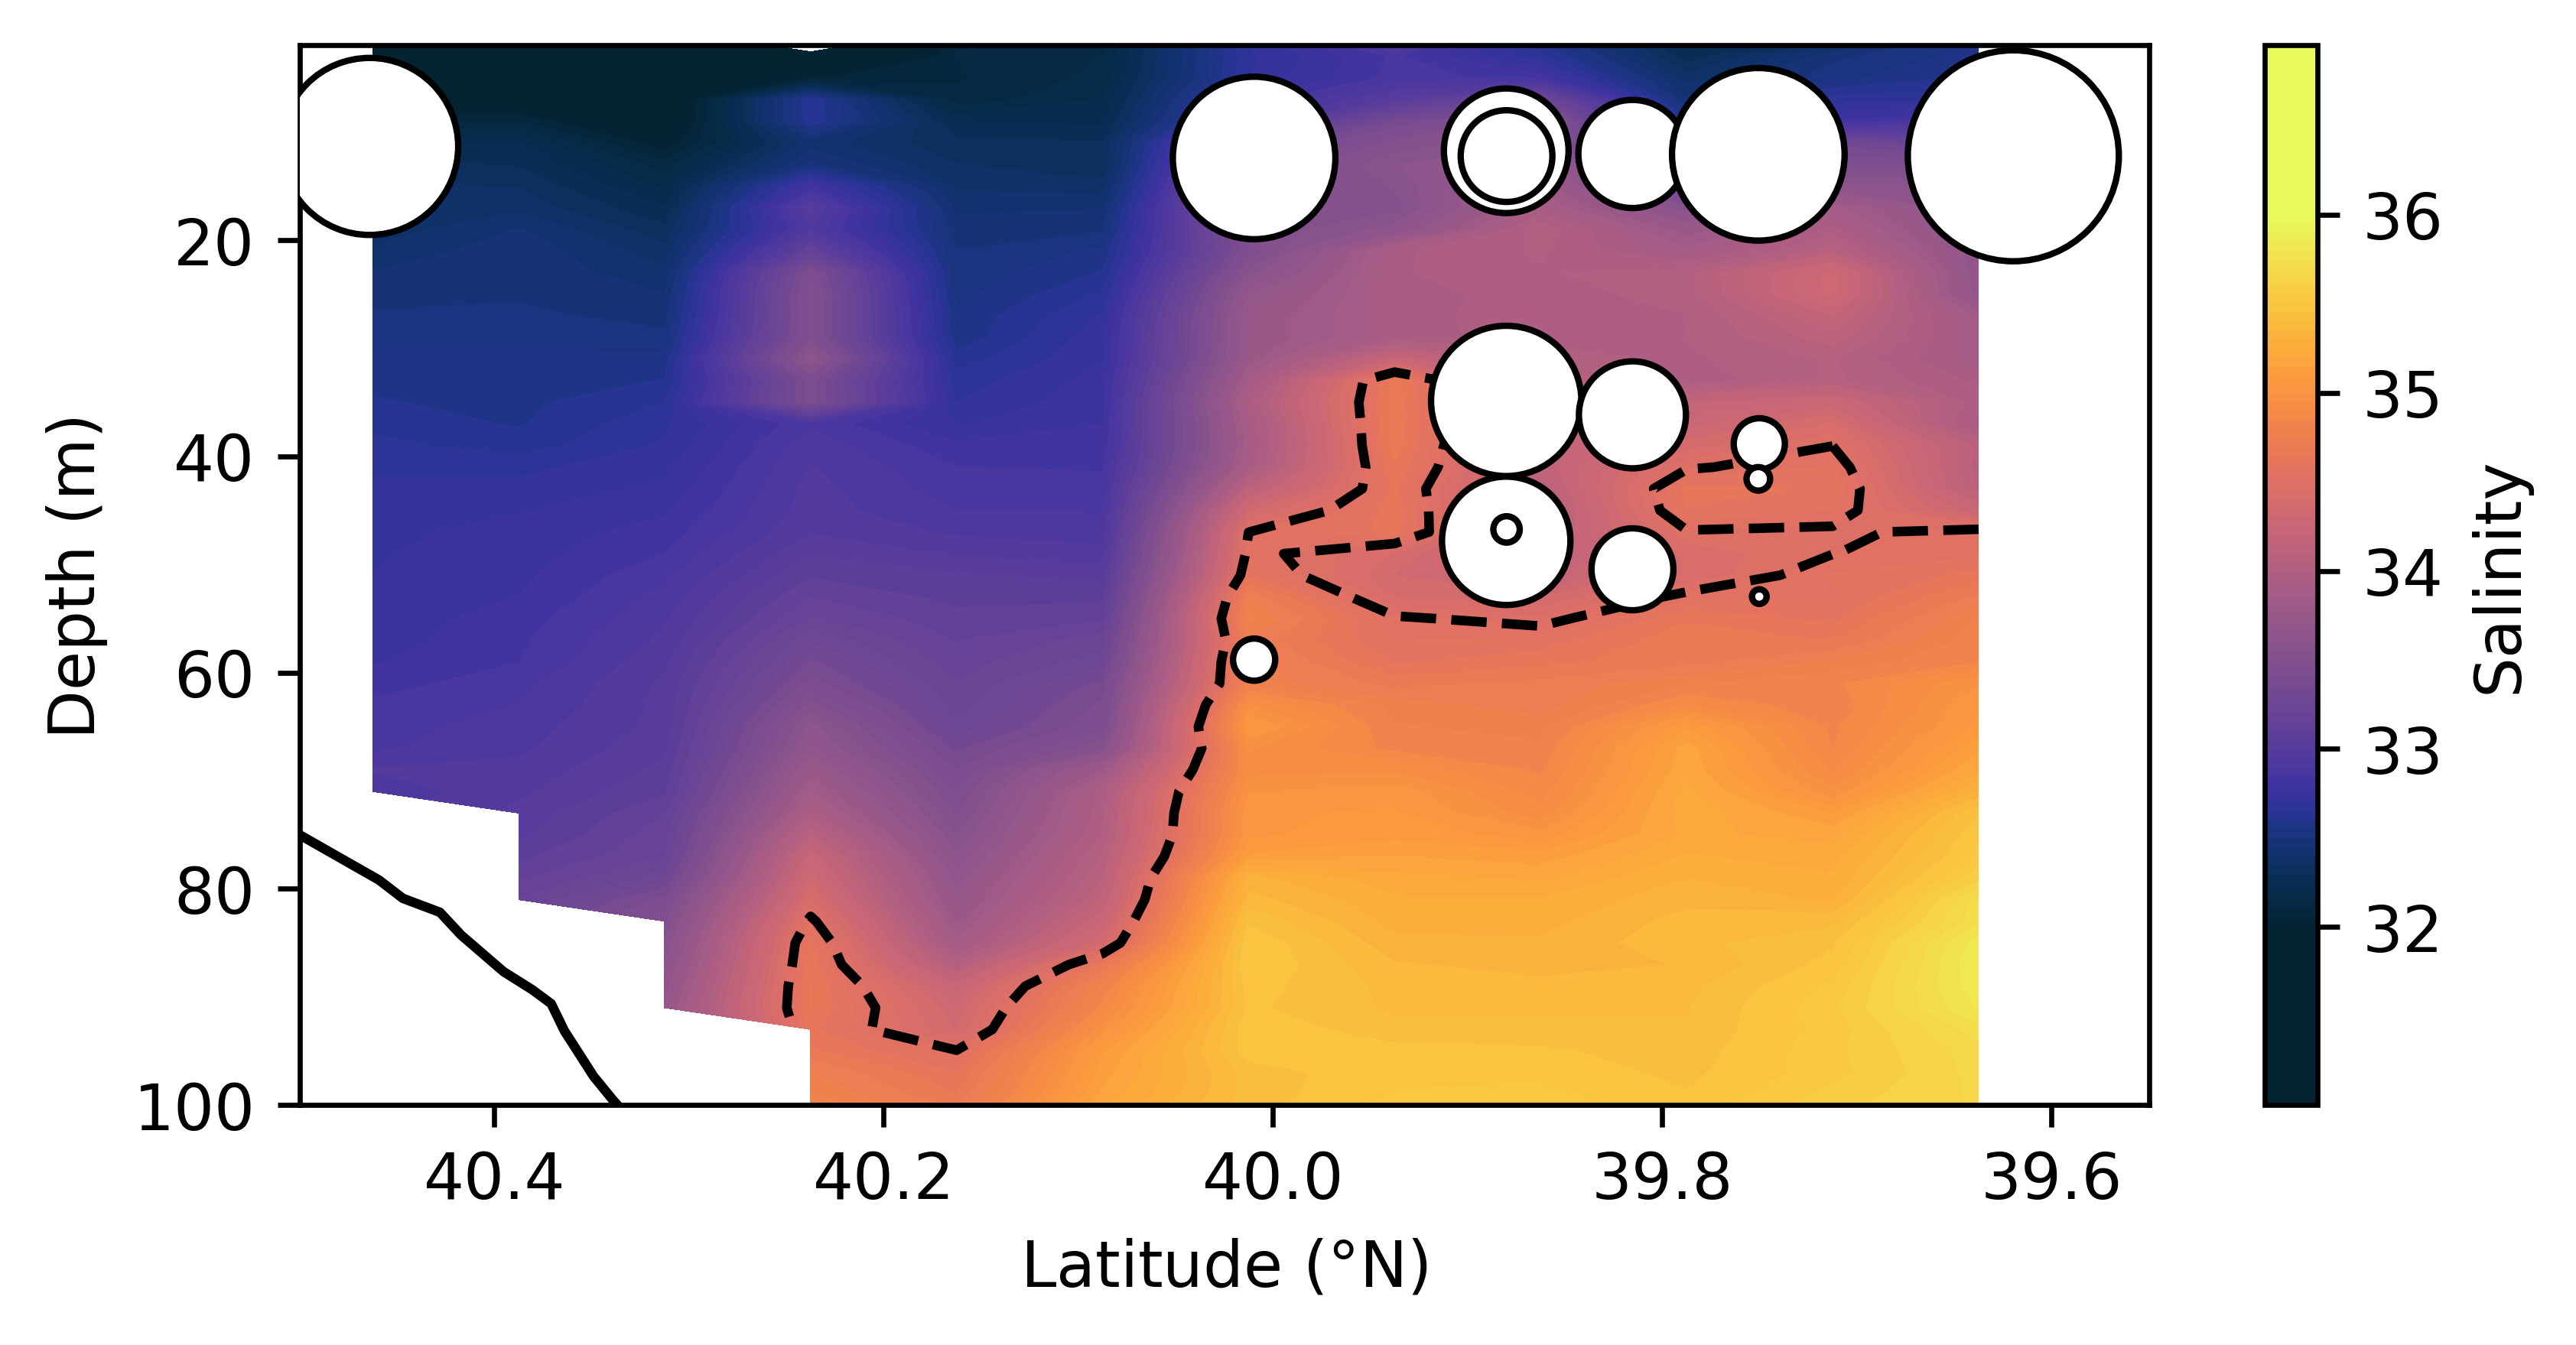

In [186]:
low_cast = 1
high_cast = 39

make_sal_section()
# July 6 - 8

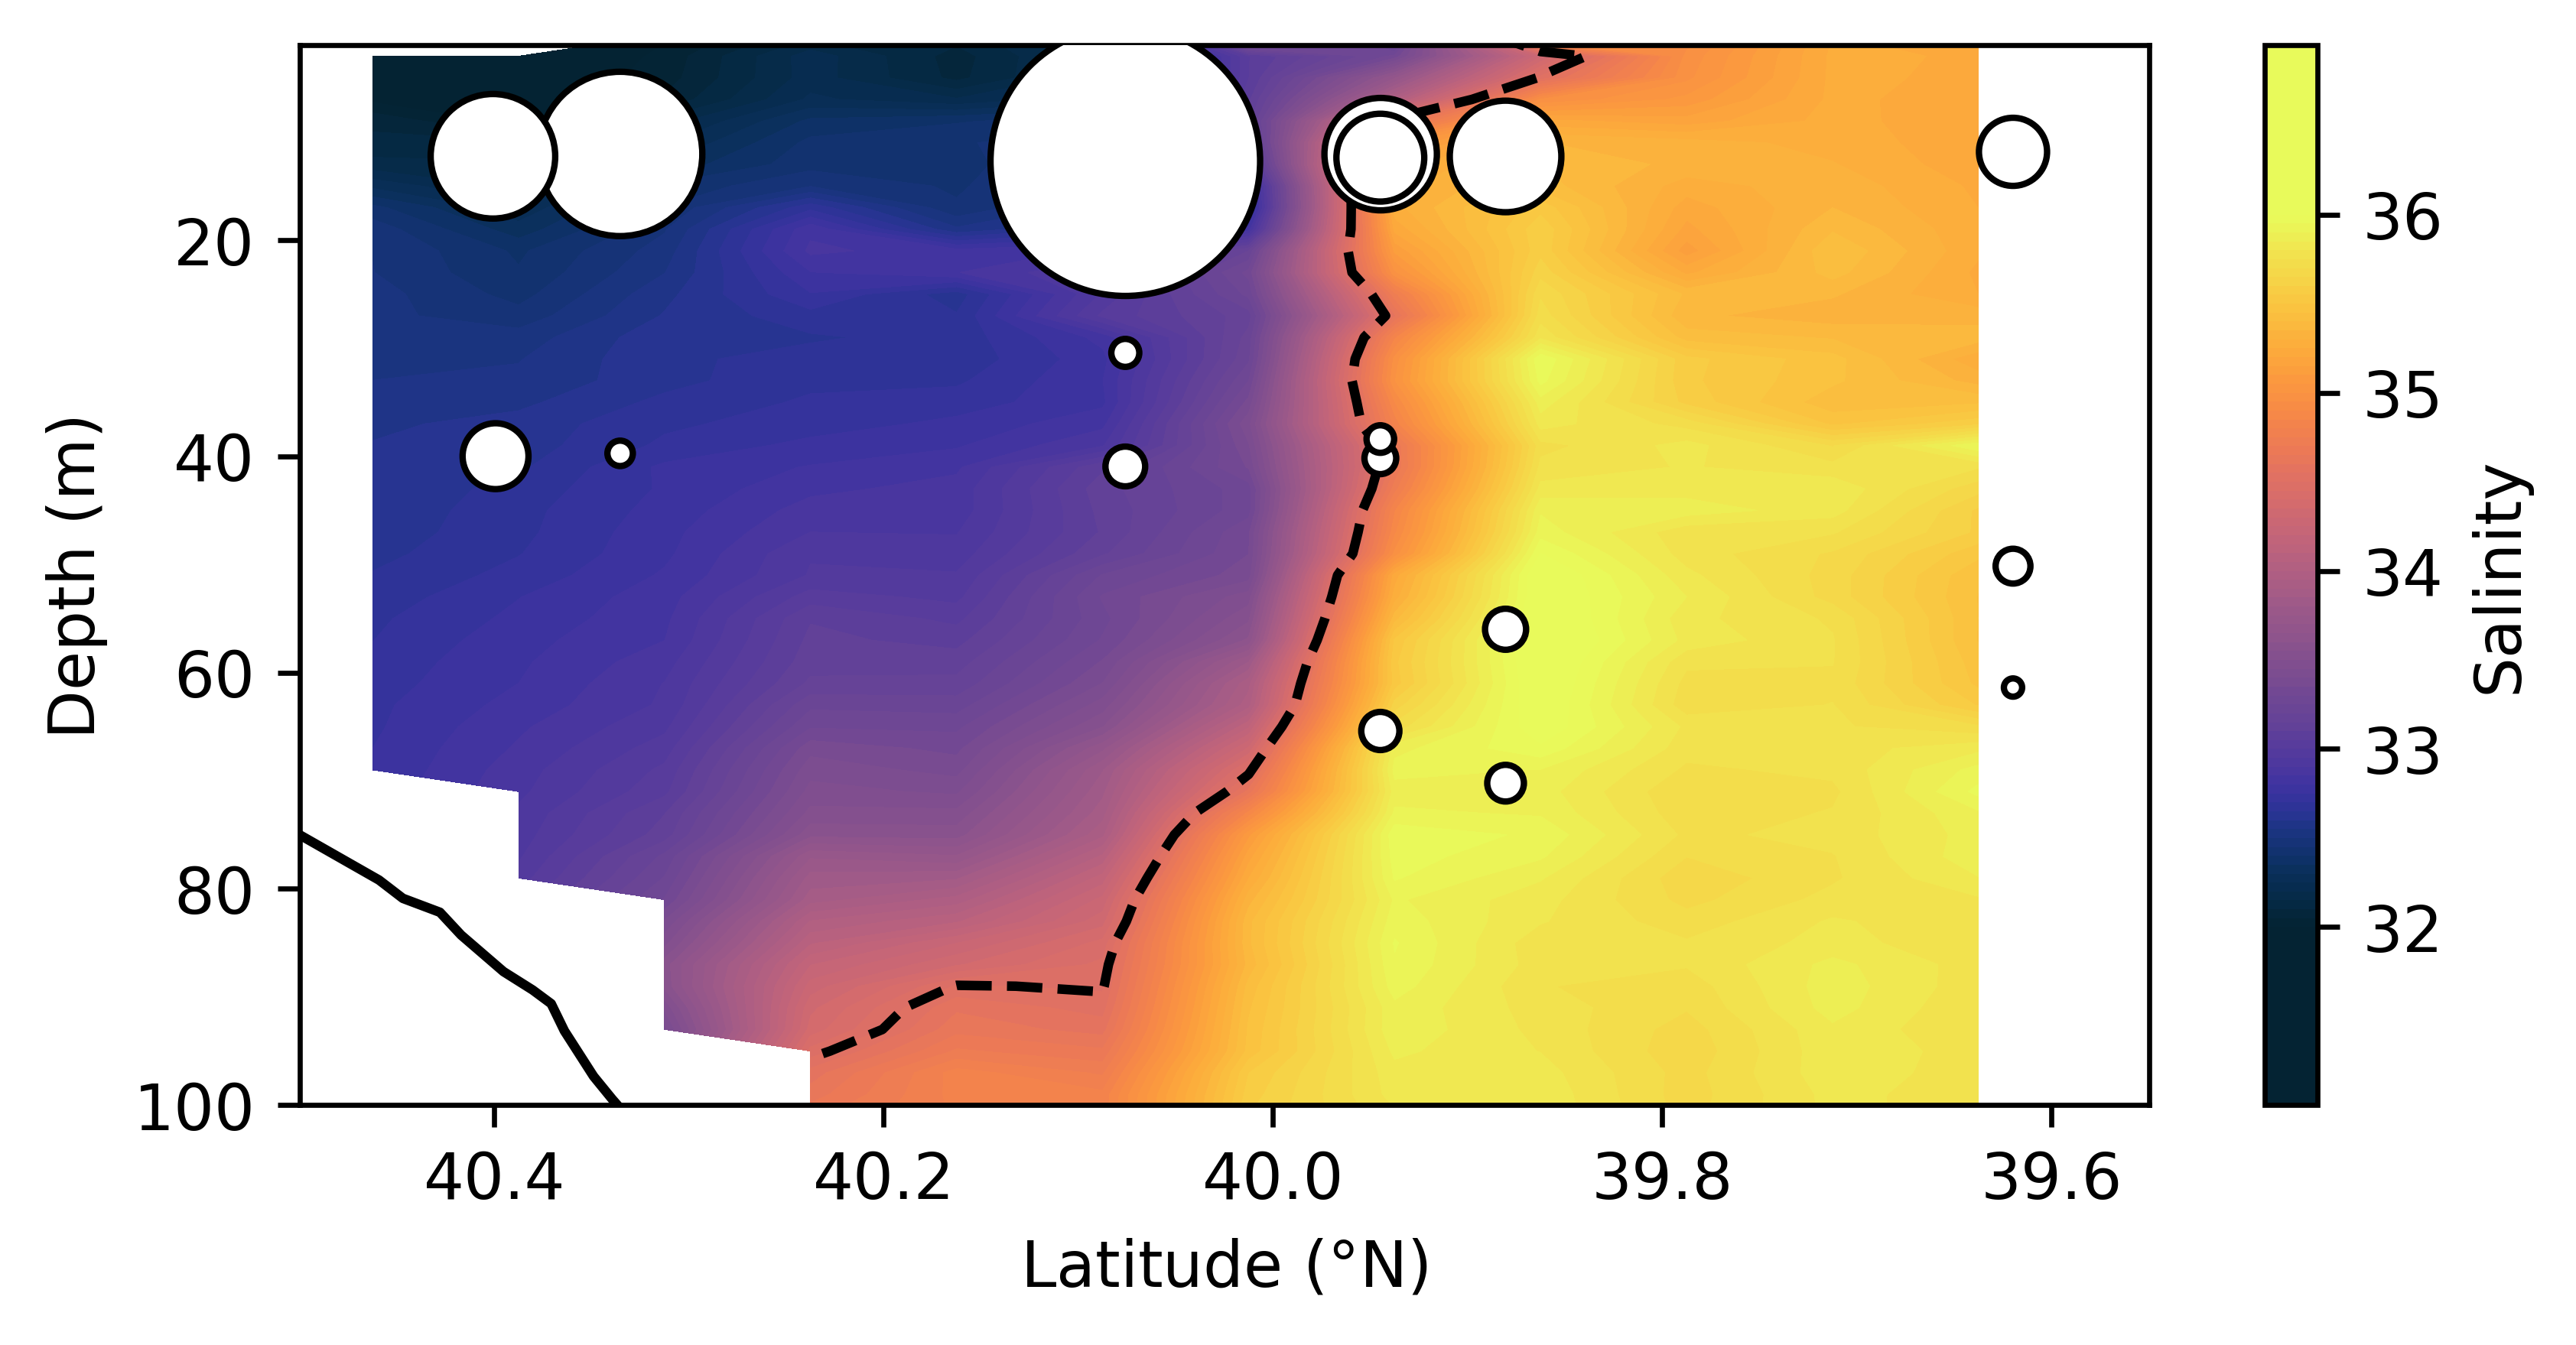

In [187]:
low_cast = 68
high_cast = 111

make_sal_section()
# July 12-16